Visualization 1:Best Months to Visit Most Popular Destination
Most visited Destination: Paris (Visited 14 times)


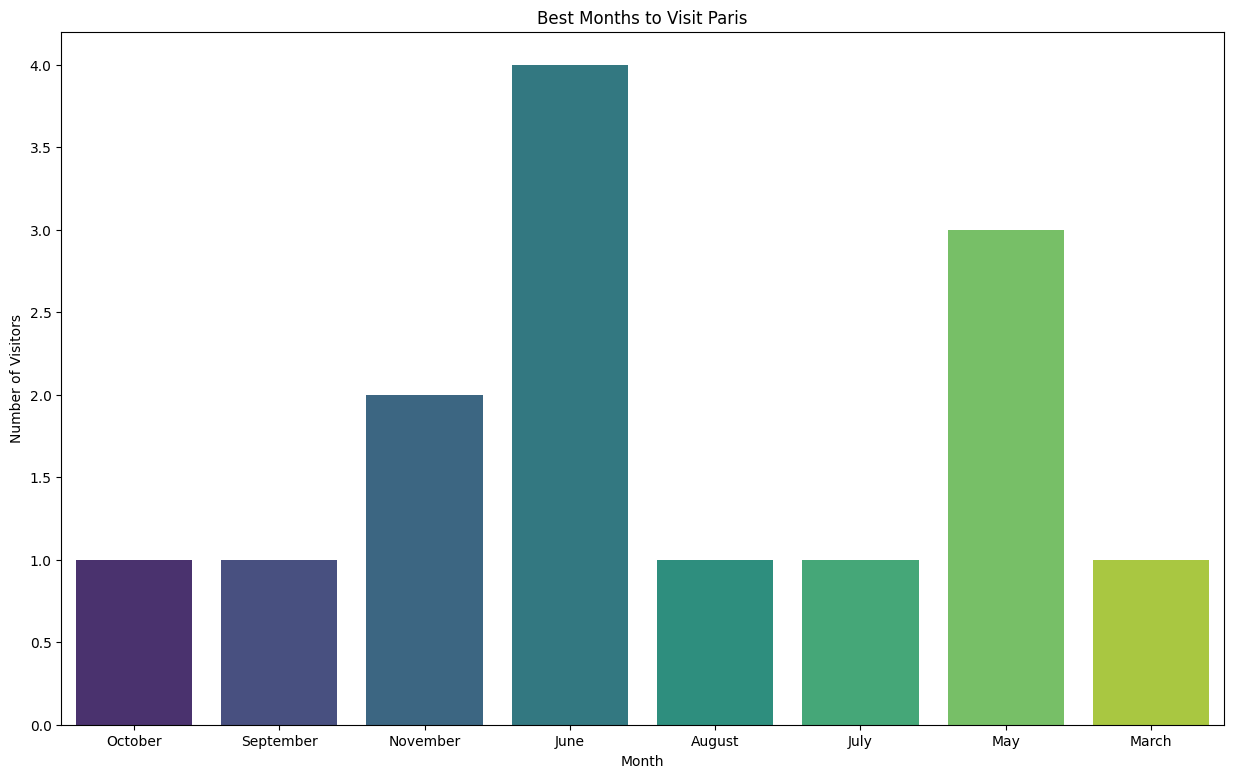

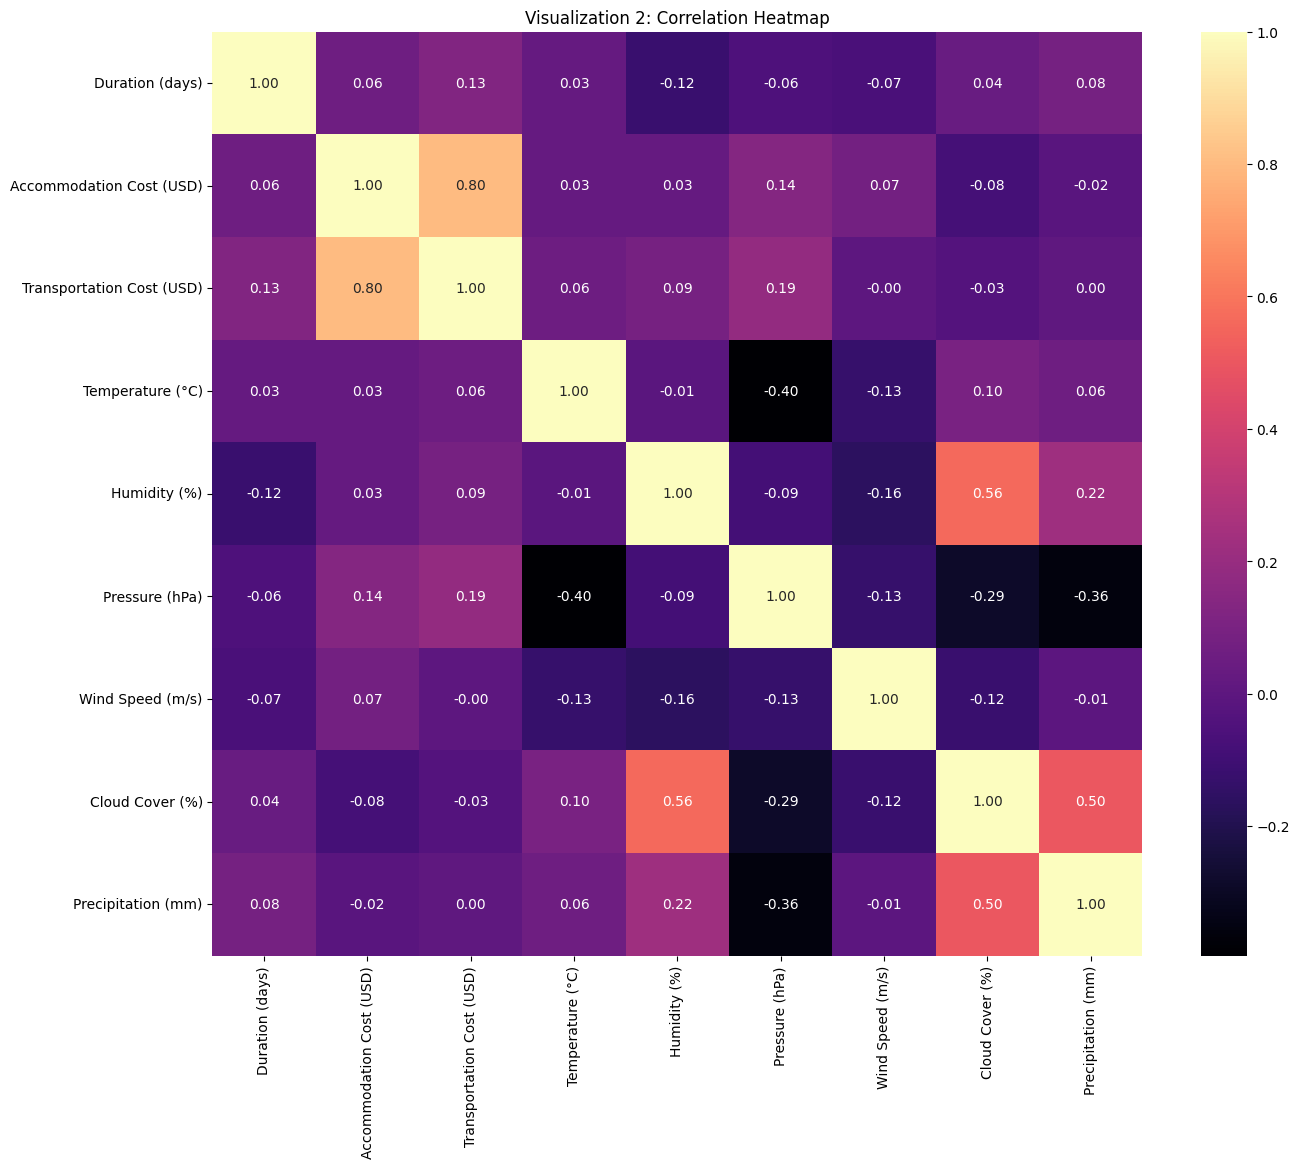

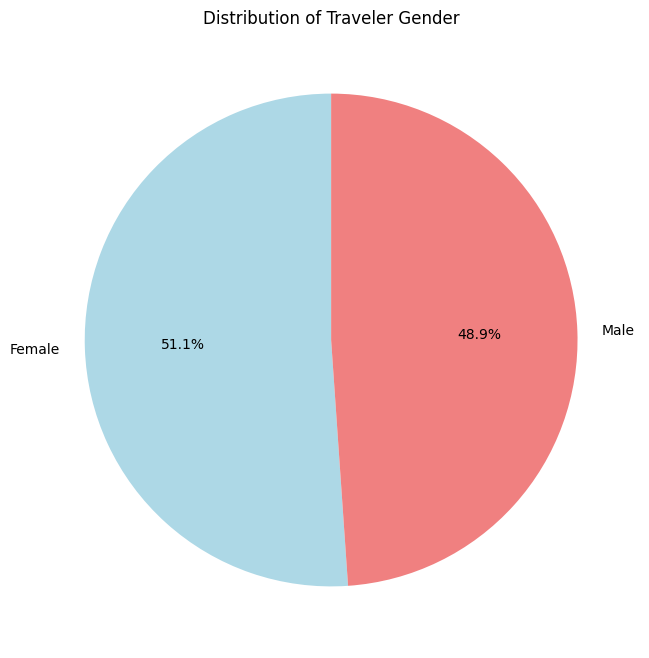

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster

# Data Set Path
dfset_path = 'data/processed/Tourism_Weather_Merged.csv'
df = pd.read_csv(dfset_path)

# Visualization 1: Best Months to Visit Most Popular Destination
most_visited_dict = df['Destination'].value_counts().to_dict()
most_visited_city = max(most_visited_dict, key=most_visited_dict.get)
most_visited_count = most_visited_dict[most_visited_city]

print("Visualization 1:Best Months to Visit Most Popular Destination")
print(f"Most visited Destination: {most_visited_city} (Visited {most_visited_count} times)")

most_visited_df = df[df['Destination'] == most_visited_city]

plt.figure(figsize=(15, 9))
sns.countplot(x='Month', data=most_visited_df, palette='viridis')
plt.title(f'Best Months to Visit {most_visited_city}')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.show()

# Visualization 2: Correlation Heatmap
numerical_columns = ['Duration (days)', 'Accommodation Cost (USD)', 'Transportation Cost (USD)', 'Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Wind Speed (m/s)', 'Cloud Cover (%)', 'Precipitation (mm)']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(15, 12))  # Larger size
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")  # Vibrant colors with 'magma' colormap
plt.title('Visualization 2: Correlation Heatmap')
plt.show()

# Visualization 3: Box plot for Temperature Distribution by Destination
fig = px.box(df, x='Destination', y='Temperature (°C)', title='Temperature Distribution by Destination',
             labels={'Temperature (°C)': 'Temperature (°C)', 'Destination': 'Destination'})

fig.update_layout(xaxis=dict(tickangle=-45), showlegend=False)
fig.show()

# Visualization 4: Traveler Nationality Distribution
import plotly.express as px
fig = px.treemap(df, path=['Traveler nationality'], title='Traveler Nationality Distribution',
                 labels={'Traveler nationality': 'Nationality'}, color='Traveler nationality')
fig.show()

# Visualization 5: Calculate Total Cost associated with Trip Duration vs Cost Line Chart:
df['Total Cost'] = df['Accommodation Cost (USD)'] + df['Transportation Cost (USD)']
fig = px.line(df, x='Duration (days)', y='Total Cost', color='Destination', markers=True,
              title='Trip Duration vs. Total Cost',
              labels={'Duration (days)': 'Duration (days)', 'Total Cost': 'Total Cost (USD) = Accom Cost (USD) + Transportation Cost (USD)'},
              template='plotly_dark')

fig.update_yaxes(title_standoff=10)

fig.show()

# Visualization 6: Spatial analysis and exploration of data associated with specific locations
df['Month'] = df['Month'] + '-01-2023'
df['Month'] = pd.to_datetime(df['Month'], format='%B-%d-%Y')
df['Month'] = df['Month'].dt.strftime('%Y-%m')

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)

marker_cluster = MarkerCluster()

for index, row in df.iterrows():
    popup_text = f"Destination: {row['Destination']}<br>Month: {row['Month']}<br>Temperature: {row['Temperature (°C)']}°C<br>Humidity: {row['Humidity (%)']}%"

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, parse_html=True),
        icon=folium.Icon(color='blue'),
    ).add_to(marker_cluster)

marker_cluster.add_to(m)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Spatial analysis and exploration of data associated with specific Destinations - Dharani</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m.save('results/Spatial analysis and exploration of data associated with specific locations.html')

# Visualization 7:Pie-Chart Representation of Travel Gender
gender_counts = df['Traveler gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Traveler Gender')
plt.show()
